<ipython-input-21-ac447e9c0e05>:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mode()[0], inplace=True)
<ipython-input-21-ac447e9c0e05>:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', t

Statistical Analysis Table:
                         count  mean        std  min    25%   50%     75%  \
Ladder                   156.0  78.5  45.177428  1.0  39.75  78.5  117.25   
SD_of_Ladder             156.0  78.5  45.177428  1.0  39.75  78.5  117.25   
Positive_affect          156.0  78.0  44.743715  1.0  39.75  78.0  116.25   
Negative_affect          156.0  78.0  44.743715  1.0  39.75  78.0  116.25   
Social_support           156.0  78.0  44.743715  1.0  39.75  78.0  116.25   
Freedom                  156.0  78.0  44.743715  1.0  39.75  78.0  116.25   
Corruption               156.0  74.5  41.747088  1.0  39.75  74.5  109.25   
Generosity               156.0  78.0  44.743715  1.0  39.75  78.0  116.25   
Log_of_GDP_per_capita    156.0  76.5  43.450973  1.0  39.75  76.5  113.25   
Healthy_life_expectancy  156.0  75.5  42.596191  1.0  39.75  75.5  111.25   

                           max  Kurtosis  Skewness  
Ladder                   156.0 -1.200000       0.0  
SD_of_Ladder      

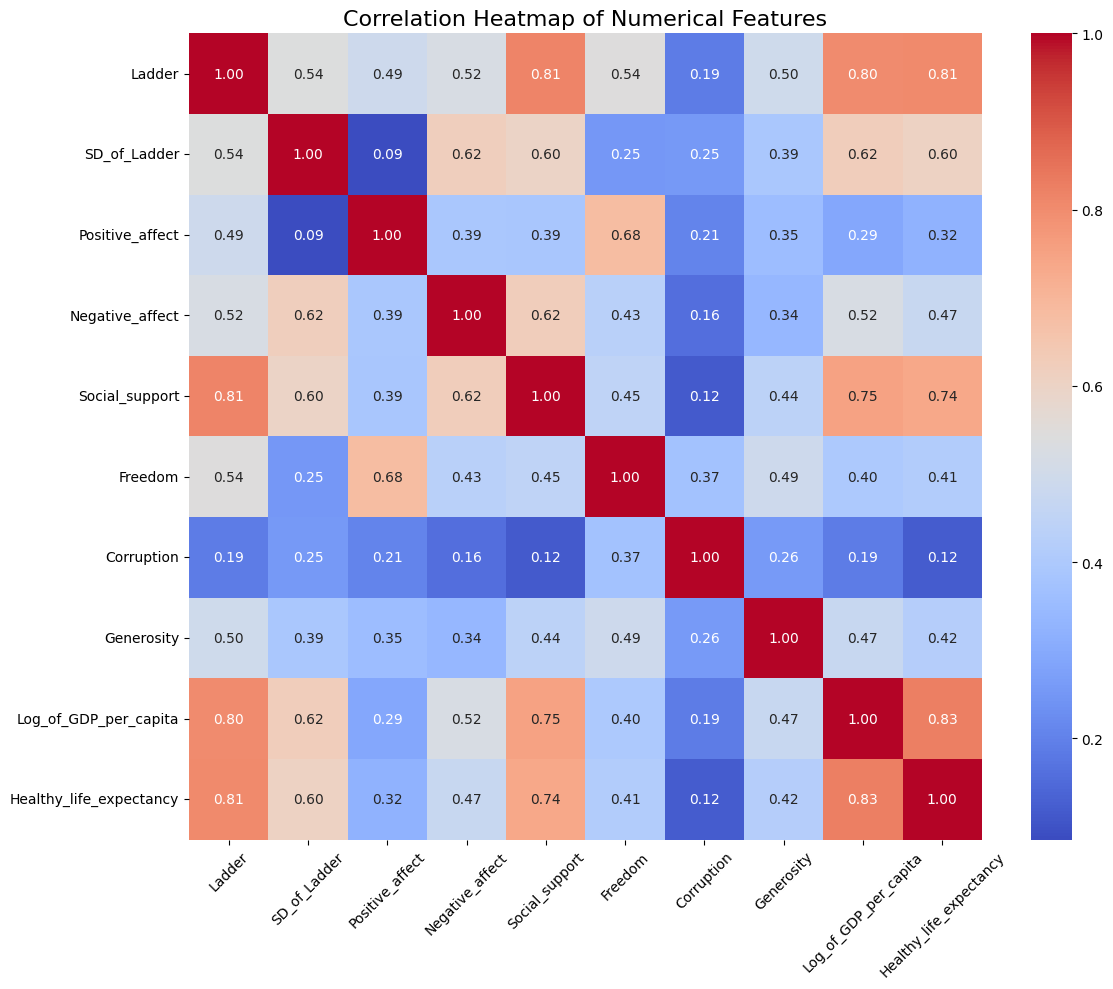

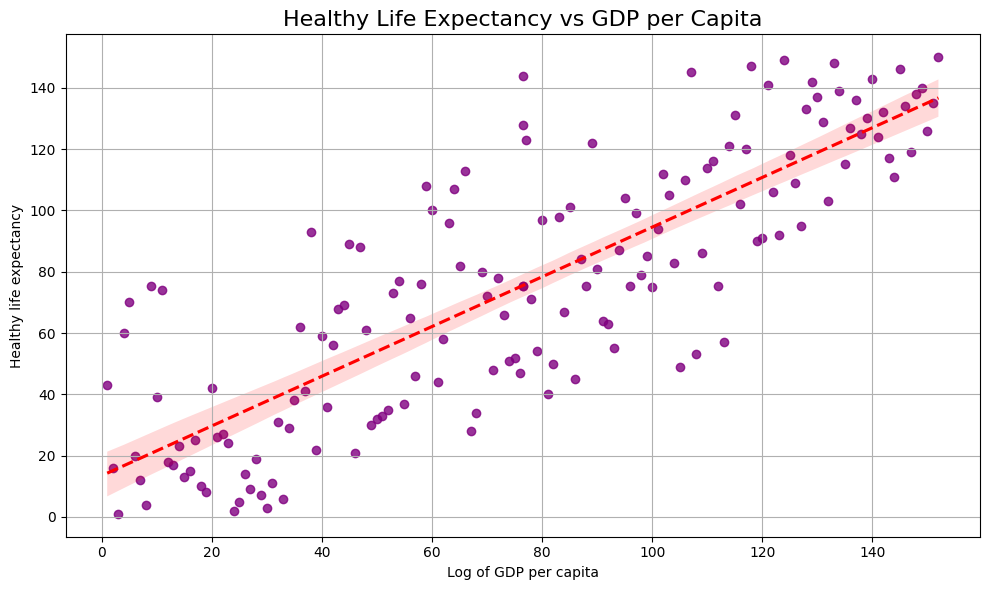

<ipython-input-21-ac447e9c0e05>:122: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


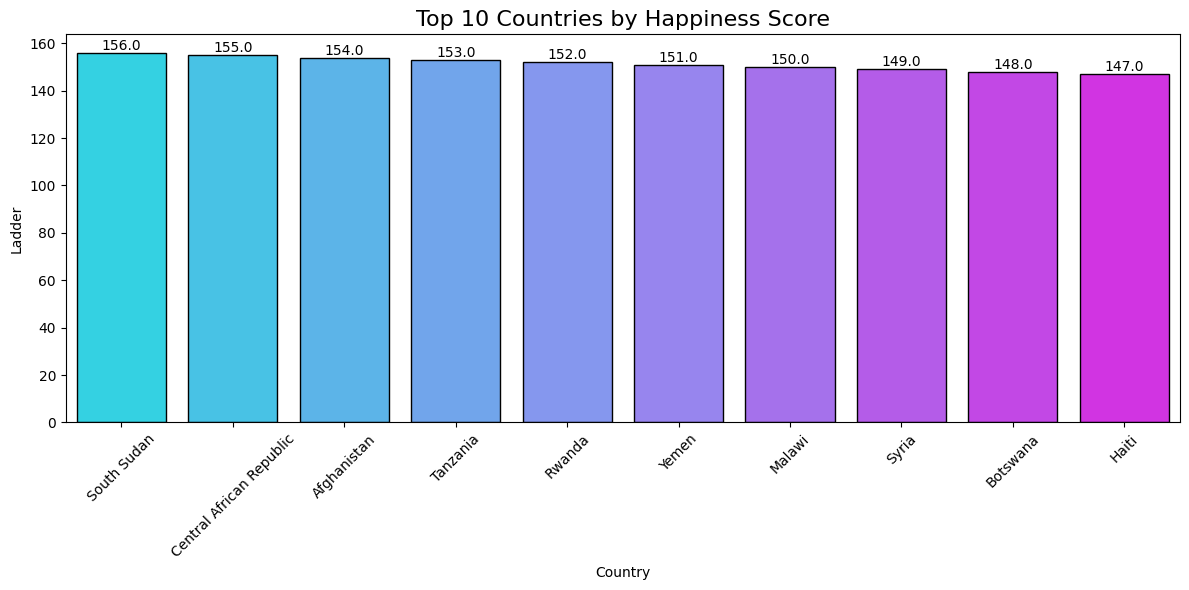

<ipython-input-21-ac447e9c0e05>:152: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(


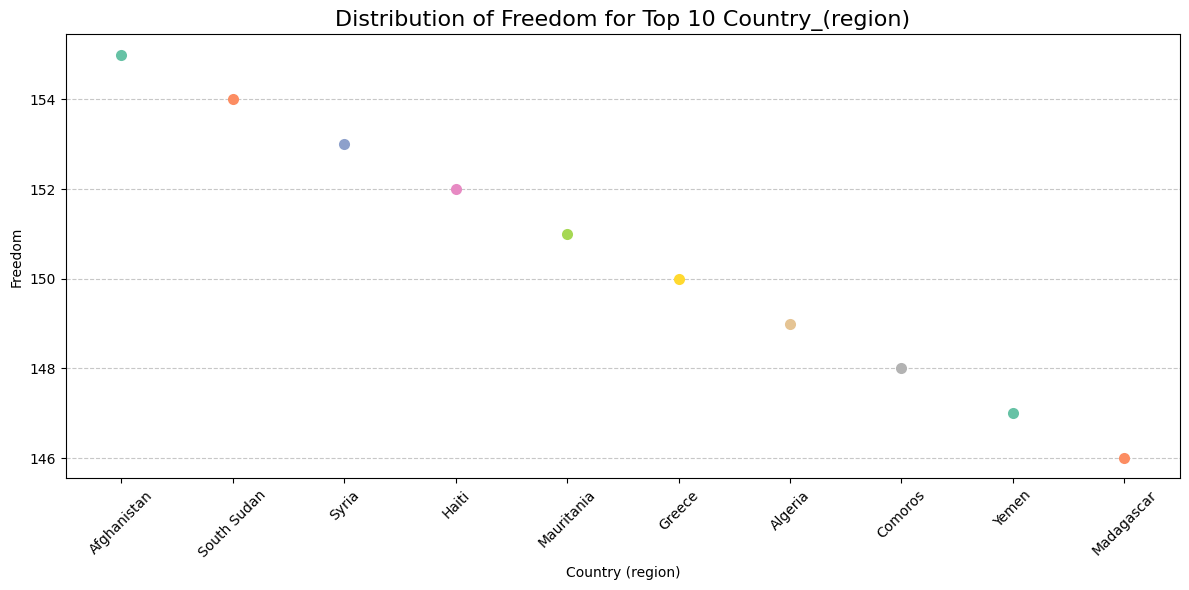

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


def load_and_clean_data(file_path):
    """
    Load and clean the dataset.

    Parameters:
    - file_path: str, path to the dataset file.

    Returns:
    - df: pandas DataFrame, cleaned dataset.
    """
    df = pd.read_csv(file_path)

    # Renaming columns to standard format
    df.columns = df.columns.str.replace("\n", "_").str.replace(" ", "_")

    # Handling missing values
    for column in df.columns:
        if df[column].dtype == "object":
            df[column].fillna(df[column].mode()[0], inplace=True)
        else:
            df[column].fillna(df[column].mean(), inplace=True)

    return df


def clean_numerical_data(df):
    """
    Ensure numerical columns are cleaned for calculations.

    Parameters:
    - df: pandas DataFrame.

    Returns:
    - df_cleaned: pandas DataFrame with cleaned numerical columns.
    """
    numerical_columns = df.select_dtypes(include=["float64", "int64"]).columns
    df_cleaned = df[numerical_columns].apply(pd.to_numeric, errors="coerce")
    return df_cleaned


def display_statistical_summary(df):
    """
    Display a statistical summary of numerical data.

    Parameters:
    - df: pandas DataFrame.
    """
    summary = df.describe().transpose()
    summary["Kurtosis"] = df.kurtosis()
    summary["Skewness"] = df.skew()
    print("Statistical Analysis Table:")
    print(summary)


def plot_correlation_heatmap(df):
    """
    Plot a heatmap showing correlations between numerical columns.

    Parameters:
    - df: pandas DataFrame.
    """
    plt.figure(figsize=(12, 10))
    correlation_matrix = df.corr()
    sns.heatmap(
        correlation_matrix,
        annot=True,
        cmap="coolwarm",
        fmt=".2f",
        cbar=True,
    )
    plt.title("Correlation Heatmap of Numerical Features", fontsize=16)
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()


def plot_scatter_with_regression(df, x_column, y_column, title):
    """
    Plot scatter plot with regression line.

    Parameters:
    - df: pandas DataFrame.
    - x_column: str, column name for x-axis.
    - y_column: str, column name for y-axis.
    - title: str, title of the plot.
    """
    plt.figure(figsize=(10, 6))
    sns.regplot(
        x=x_column,
        y=y_column,
        data=df,
        scatter_kws={"color": "purple"},
        line_kws={"color": "red", "linestyle": "--"}
    )
    plt.title(title, fontsize=16)
    plt.xlabel(x_column.replace("_", " "))
    plt.ylabel(y_column.replace("_", " "))
    plt.grid(True)
    plt.tight_layout()
    plt.show()


def plot_top_n_countries(df, column, category, top_n, title_suffix):
    """
    Plot a bar chart for the top N countries by a given column.

    Parameters:
    - df: pandas DataFrame.
    - column: str, column name for values.
    - category: str, column name for categories.
    - top_n: int, number of top countries to display.
    - title_suffix: str, suffix for the plot title.
    """
    df_top = df.nlargest(top_n, column)
    plt.figure(figsize=(12, 6))
    sns.barplot(
        x=category,
        y=column,
        data=df_top,
        palette="cool",
        edgecolor="black"
    )
    for index, value in enumerate(df_top[column]):
        plt.text(index, value, f"{value:.1f}", ha="center", va="bottom")
    plt.title(f"Top {top_n} Countries by {title_suffix}", fontsize=16)
    plt.xlabel("Country")
    plt.ylabel(column.replace("_", " "))
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


def plot_distribution(df, column, category, top_n, title_suffix):
    """
    Plot a distribution for the top N categories by a given column.

    Parameters:
    - df: pandas DataFrame.
    - column: str, column name for values.
    - category: str, column name for categories.
    - top_n: int, number of top categories to display.
    - title_suffix: str, suffix for the plot title.
    """
    df_top = df.nlargest(top_n, column)
    plt.figure(figsize=(12, 6))
    sns.stripplot(
        x=category,
        y=column,
        data=df_top,
        jitter=True,
        size=8,
        palette="Set2",
        edgecolor="black"
    )
    plt.title(f"Distribution of {title_suffix} for Top {top_n} {category}", fontsize=16)
    plt.xlabel(category.replace("_", " "))
    plt.ylabel(column.replace("_", " "))
    plt.xticks(rotation=45)
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.tight_layout()
    plt.show()


# Main Script
if __name__ == "__main__":
    # File path to the dataset
    file_path = "world-happiness-report-2019.csv"

    # Step 1: Load and clean the dataset
    df = load_and_clean_data(file_path)

    # Step 2: Ensure numerical data is clean
    df_numerical = clean_numerical_data(df)

    # Step 3: Display statistical summary
    display_statistical_summary(df_numerical)

    # Step 4: Correlation heatmap
    plot_correlation_heatmap(df_numerical)

    # Step 5: Scatter plot with regression
    plot_scatter_with_regression(
        df_numerical,
        x_column="Log_of_GDP_per_capita",
        y_column="Healthy_life_expectancy",
        title="Healthy Life Expectancy vs GDP per Capita"
    )

    # Step 6: Top 10 countries by happiness score
    plot_top_n_countries(
        df,
        column="Ladder",
        category="Country_(region)",
        top_n=10,
        title_suffix="Happiness Score"
    )

    # Step 7: Distribution of Freedom for top 10 countries
    plot_distribution(
        df,
        column="Freedom",
        category="Country_(region)",
        top_n=10,
        title_suffix="Freedom"
    )
